# Анализ маркетинговых гипотез

## Описание проекта
Отдел маркетинга интернет-магазина подготовили список гипотез для увеличения выручки.

### Цень: Приоритизировать гипотезы и запустить A/B-тест. 

In [1]:
#libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import mannwhitneyu

### Часть 1. Приоритизация гипотез.

Задачи:
1. Загрузить файл.
2. Применить фреймворк ICE для приоритизации гипотез.
3. Применить фреймворк RICE для приоритизации гипотез.

In [2]:
#Загрузка и просмотр датасета для 1 части
df1 = pd.read_csv('/datasets/hypothesis.csv')
df1

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика,...",3,10,8,6
1,"Запустить собственную службу доставки, что сок...",2,5,4,10
2,Добавить блоки рекомендаций товаров на сайт ин...,8,3,7,3
3,"Изменить структура категорий, что увеличит кон...",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы уве...",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине,...",3,2,2,3
6,Показать на главной странице баннеры с актуаль...,5,3,8,3
7,Добавить форму подписки на все основные страни...,10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день...",1,9,9,5


In [3]:
#df1.info()

In [4]:
#df1.duplicated().sum()

=> Пропусков и дубликатов нет, видо без дополнительной проверки, так как мало строк.

In [5]:
#Расчет ICE
df1['ICE'] = round((df1['Impact'] * df1['Confidence'])/df1['Efforts'], 1)
df1.sort_values(by='ICE', ascending=False)

,Hypothesis,Reach,Impact,Confidence,Efforts,ICE
8,"Запустить акцию, дающую скидку на товар в день...",1,9,9,5,16.2
0,"Добавить два новых канала привлечения трафика,...",3,10,8,6,13.3
7,Добавить форму подписки на все основные страни...,10,7,8,5,11.2
6,Показать на главной странице баннеры с актуаль...,5,3,8,3,8.0
2,Добавить блоки рекомендаций товаров на сайт ин...,8,3,7,3,7.0
1,"Запустить собственную службу доставки, что сок...",2,5,4,10,2.0
5,"Добавить страницу отзывов клиентов о магазине,...",3,2,2,3,1.3
3,"Изменить структура категорий, что увеличит кон...",8,3,3,8,1.1
4,"Изменить цвет фона главной страницы, чтобы уве...",3,1,1,1,1.0


In [6]:
pd.set_option("display.max_colwidth", 400)

In [7]:
display(df1.sort_values(by='ICE', ascending=False))

,Hypothesis,Reach,Impact,Confidence,Efforts,ICE
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5,16.2
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6,13.3
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5,11.2
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3,8.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3,7.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10,2.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3,1.3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8,1.1
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1,1.0


=> Гипотеза с запуском акции получила наивысшую иценку, а изменения цвета фона наименьшую.

In [8]:
#Расчет RICE
df1['RICE'] = (df1['Reach'] * df1['Impact'] * df1['Confidence'])/df1['Efforts']
df1.sort_values(by='RICE', ascending=False)

,Hypothesis,Reach,Impact,Confidence,Efforts,ICE,RICE
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5,11.2,112.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3,7.0,56.0
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6,13.3,40.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3,8.0,40.0
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5,16.2,16.2
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8,1.1,9.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10,2.0,4.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3,1.3,4.0
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1,1.0,3.0


=> Гипотеза с добавлением подписки получила наивысшую иценку, а изменения цвета фона также осталась с наименьшей оценктой.

=> Использование Reach в RICE позволяет учитывать, насколько большая аудитория будет затронута изменениями. Это приводит к тому, что гипотезы с высоким охватом могут подняться в приоритете даже при умеренном влиянии.

### Часть 2. Анализ A/B-теста

In [9]:
#Загрузка и просмотр датасета для 2 части
orders = pd.read_csv('/datasets/orders.csv')
orders.sample(5)

,transactionId,visitorId,date,revenue,group
575,212815314,2054014923,2019-08-04,5249,A
257,225225498,2308309101,2019-08-23,14271,A
640,3730164576,1476741193,2019-08-04,15485,B
839,2368020497,2870367609,2019-08-21,1410,B
430,1168756094,3202540741,2019-08-24,3150,A


In [10]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   transactionId  1197 non-null   int64 
 1   visitorId      1197 non-null   int64 
 2   date           1197 non-null   object
 3   revenue        1197 non-null   int64 
 4   group          1197 non-null   object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB


In [11]:
orders.duplicated().sum()

0

=> Пропусков и дубликатов нет

In [12]:
visitors = pd.read_csv('/datasets/visitors.csv')
visitors.sample(5)

,date,group,visitors
56,2019-08-26,B,676
25,2019-08-26,A,722
44,2019-08-14,B,746
13,2019-08-14,A,735
37,2019-08-07,B,709


In [13]:
visitors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      62 non-null     object
 1   group     62 non-null     object
 2   visitors  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


In [14]:
visitors.duplicated().sum()

0

=> Пропусков и дубликатов нет

In [15]:
# Находим пользователей, присутствующих в обеих группах
users_in_both_groups = orders.groupby('visitorId')['group'].nunique()
users_with_issues = users_in_both_groups[users_in_both_groups > 1].index

# Выводим информацию о таких пользователях
if len(users_with_issues) > 0:
    print(f"Найдено {len(users_with_issues)} пользователей, присутствующих в обеих группах.")
else:
    print("Не найдено пользователей, присутствующих в обеих группах.")

# Оцениваем процент таких пользователей от общего количества уникальных пользователей
total_unique_users = orders['visitorId'].nunique()
percentage_users_with_issues = len(users_with_issues) / total_unique_users * 100

print(f"Процент пользователей, находящихся в обеих группах: {percentage_users_with_issues:.2f}%")

# Стратегия обработки данных
if percentage_users_with_issues > 1:  # Например, считаем значительным для значений больше 1%
    print("Рекомендуется удалить этих пользователей из анализа для повышения точности результатов A/B-теста.")
    orders = orders[~orders['visitorId'].isin(users_with_issues)]
else:
    print("Процент пересекающихся пользователей невелик, их влияние на результат минимально.")
    orders = orders

Найдено 58 пользователей, присутствующих в обеих группах.
Процент пользователей, находящихся в обеих группах: 5.63%
Рекомендуется удалить этих пользователей из анализа для повышения точности результатов A/B-теста.


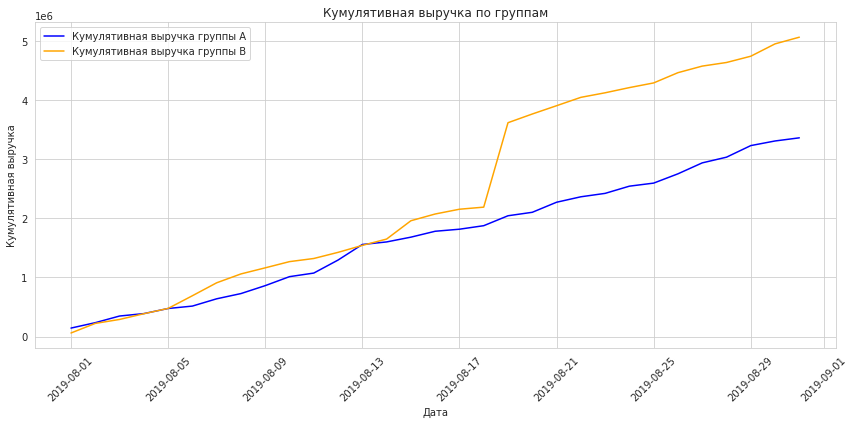

In [16]:
# График кумулятивной выручки по группам.
# Приведение данных к нужному типу
orders['date'] = pd.to_datetime(orders['date'])
visitors['date'] = pd.to_datetime(visitors['date'])

# Получение уникальных комбинаций даты и группы
datesGroups = orders[['date', 'group']].drop_duplicates()

# Агрегирование данных по заказам для кумулятивной выручки
ordersAggregated = datesGroups.apply(
    lambda x: orders[
        (orders['date'] <= x['date']) & (orders['group'] == x['group'])
    ].agg(
        {
            'date': 'max',
            'group': 'max',
            'transactionId': 'nunique',
            'visitorId': 'nunique',
            'revenue': 'sum',
        }
    ),
    axis=1,
).sort_values(by=['date', 'group'])

# Разделение данных по группам
cumulativeRevenueA = ordersAggregated[ordersAggregated['group'] == 'A']
cumulativeRevenueB = ordersAggregated[ordersAggregated['group'] == 'B']

# Визуализация кумулятивной выручки по группам
plt.figure(figsize=(12, 6))
sns.set_style("whitegrid")

plt.plot(
    cumulativeRevenueA['date'],
    cumulativeRevenueA['revenue'],
    label='Кумулятивная выручка группы A',
    color='blue'
)

plt.plot(
    cumulativeRevenueB['date'],
    cumulativeRevenueB['revenue'],
    label='Кумулятивная выручка группы B',
    color='orange'
)

plt.xlabel('Дата')
plt.ylabel('Кумулятивная выручка')
plt.title('Кумулятивная выручка по группам')
plt.legend(loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

=> Изменение в группе B могло позитивно сказаться на её показателях. Резкий рост также может быть связан с несколькими аномально высокими заказами, необходимо проверить данные на наличие выбросов.

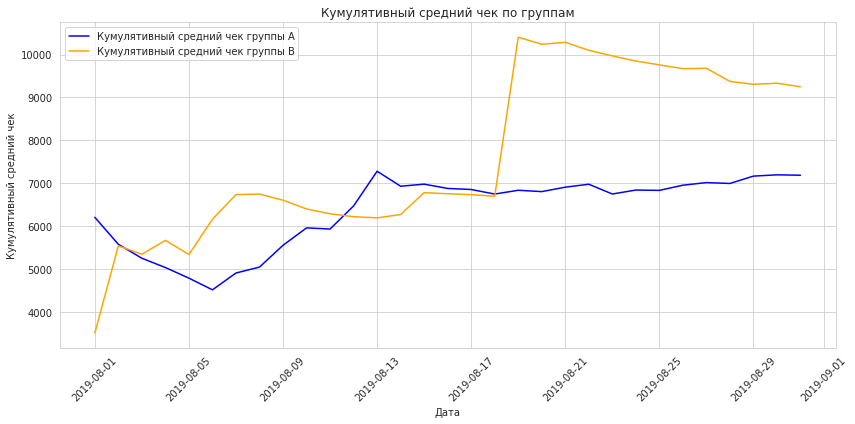

In [17]:
# График кумулятивного среднего чека по группам.
# Агрегирование данных по заказам
ordersAggregated = datesGroups.apply(
    lambda x: orders[
        (orders['date'] <= x['date']) & (orders['group'] == x['group'])
    ].agg(
        {
            'date': 'max',
            'group': 'max',
            'transactionId': 'nunique',
            'visitorId': 'nunique',
            'revenue': 'sum'
        }
    ),
    axis=1,
).sort_values(by=['date', 'group'])

# Расчет кумулятивного среднего чека
ordersAggregated['average_check'] = (
    ordersAggregated['revenue'] / ordersAggregated['transactionId']
)

# Разделение данных по группам
cumulativeAverageCheckA = ordersAggregated[ordersAggregated['group'] == 'A']
cumulativeAverageCheckB = ordersAggregated[ordersAggregated['group'] == 'B']

# Визуализация кумулятивного среднего чека по группам
plt.figure(figsize=(12, 6))
sns.set_style("whitegrid")

plt.plot(
    cumulativeAverageCheckA['date'],
    cumulativeAverageCheckA['average_check'],
    label='Кумулятивный средний чек группы A',
    color='blue'
)

plt.plot(
    cumulativeAverageCheckB['date'],
    cumulativeAverageCheckB['average_check'],
    label='Кумулятивный средний чек группы B',
    color='orange'
)

plt.xlabel('Дата')
plt.ylabel('Кумулятивный средний чек')
plt.title('Кумулятивный средний чек по группам')
plt.legend(loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

=> Эксперимент в группе B может быть причиной изменения среднего чека. Резкий рост среднего чека также может быть вызван аномальными заказами. Необходимо провести очистку данных, чтобы проверить устойчивость этих изменений, так как подобный скачок может быть результатом одного или нескольких очень крупных заказов, что требует проверки данных на выбросы.

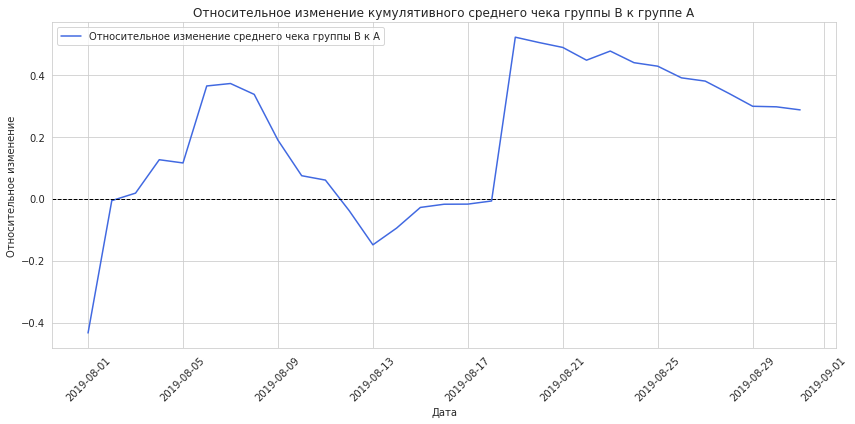

In [18]:
# График относительного изменения кумулятивного среднего чека группы B к группе A
# Агрегирование данных по заказам
ordersAggregated = datesGroups.apply(
    lambda x: orders[
        (orders['date'] <= x['date']) & (orders['group'] == x['group'])
    ].agg(
        {
            'date': 'max',
            'group': 'max',
            'transactionId': 'nunique',
            'visitorId': 'nunique',
            'revenue': 'sum'
        }
    ),
    axis=1,
).sort_values(by=['date', 'group'])

# Расчет кумулятивного среднего чека
ordersAggregated['average_check'] = (
    ordersAggregated['revenue'] / ordersAggregated['transactionId']
)

# Разделение данных по группам
cumulativeAverageCheckA = ordersAggregated[ordersAggregated['group'] == 'A']
cumulativeAverageCheckB = ordersAggregated[ordersAggregated['group'] == 'B']

# Объединение данных по среднему чеку
mergedCumulativeAverageCheck = cumulativeAverageCheckA[['date', 'average_check']].merge(
    cumulativeAverageCheckB[['date', 'average_check']],
    on='date', 
    suffixes=['A', 'B']
)

# Визуализация относительного изменения кумулятивного среднего чека
plt.figure(figsize=(12, 6))
sns.set_style("whitegrid")

plt.plot(
    mergedCumulativeAverageCheck['date'],
    mergedCumulativeAverageCheck['average_checkB'] / mergedCumulativeAverageCheck['average_checkA'] - 1,
    label="Относительное изменение среднего чека группы B к A",
    color='royalblue'
)

plt.axhline(y=0, color='black', linestyle='--', linewidth=1)
plt.xlabel('Дата')
plt.ylabel('Относительное изменение')
plt.title('Относительное изменение кумулятивного среднего чека группы B к группе A')
plt.legend(loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

=> Эксперимент в группе B может мог повлиять на увеличение среднего чека. Резкий рост среднего чека также может быть вызван аномальными заказами. Важно проверить наличие внешних факторов или событий, повлиявших на обе группы, чтобы корректно интерпретировать изменения.

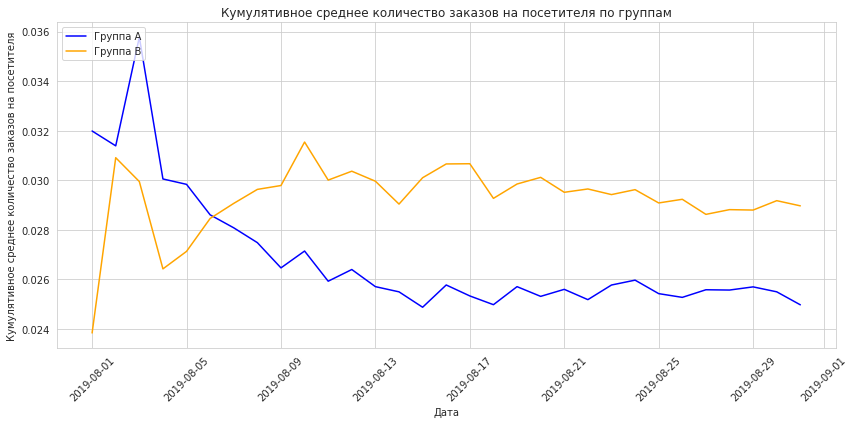

In [19]:
# График кумулятивного среднего количества заказов на посетителя по группам
# Агрегирование данных по заказам
ordersAggregated = datesGroups.apply(
    lambda x: orders[
        (orders['date'] <= x['date']) & (orders['group'] == x['group'])
    ].agg(
        {
            'date': 'max',
            'group': 'max',
            'transactionId': 'nunique'
        }
    ),
    axis=1,
).sort_values(by=['date', 'group'])

# Агрегирование данных по посетителям
visitorsAggregated = datesGroups.apply(
    lambda x: visitors[
        (visitors['date'] <= x['date']) & (visitors['group'] == x['group'])
    ].agg(
        {
            'date': 'max',
            'group': 'max',
            'visitors': 'sum'
        }
    ),
    axis=1,
).sort_values(by=['date', 'group'])

# Объединение агрегированных данных
cumulativeData = ordersAggregated.merge(
    visitorsAggregated, on=['date', 'group']
)
cumulativeData.columns = [
    'date',
    'group',
    'orders',
    'visitors',
]

# Расчет кумулятивного среднего количества заказов на посетителя
cumulativeData['orders_per_visitor'] = (
    cumulativeData['orders'] / cumulativeData['visitors']
)

# Разделение данных по группам
cumulativeOrdersPerVisitorA = cumulativeData[cumulativeData['group'] == 'A']
cumulativeOrdersPerVisitorB = cumulativeData[cumulativeData['group'] == 'B']

# Визуализация кумулятивного среднего количества заказов на посетителя по группам
plt.figure(figsize=(12, 6))
sns.set_style("whitegrid")

plt.plot(
    cumulativeOrdersPerVisitorA['date'],
    cumulativeOrdersPerVisitorA['orders_per_visitor'],
    label='Группа A',
    color='blue'
)

plt.plot(
    cumulativeOrdersPerVisitorB['date'],
    cumulativeOrdersPerVisitorB['orders_per_visitor'],
    label='Группа B',
    color='orange'
)

plt.xlabel('Дата')
plt.ylabel('Кумулятивное среднее количество заказов на посетителя')
plt.title('Кумулятивное среднее количество заказов на посетителя по группам')
plt.legend(loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

=> Группа B явно опережает группу A по количеству заказов на одного посетителя. Это может быть вызвано удачными маркетинговыми стратегиями. Большие начальные колебания могут быть следствием выбросов или случайных событий, что требует дополнительного анализа. Важно оценить, насколько данные изменения стабильны и какие факторы на них влияют.

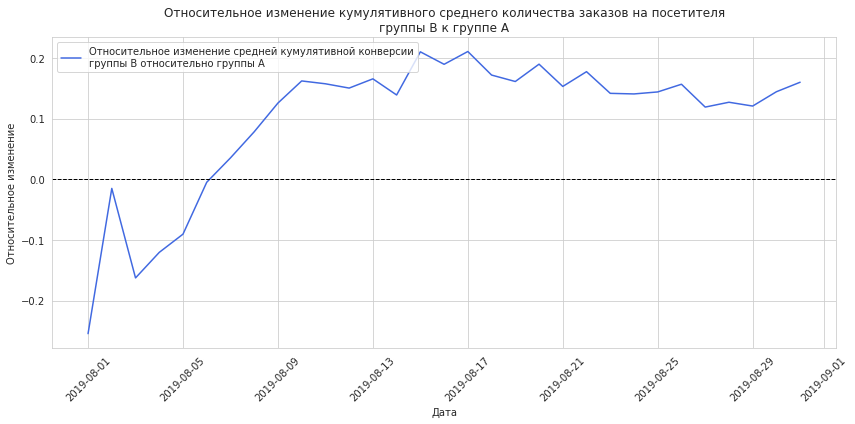

In [20]:
# График относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A.
# Агрегирование данных по заказам
ordersAggregated = datesGroups.apply(
    lambda x: orders[
        (orders['date'] <= x['date']) & (orders['group'] == x['group'])
    ].agg(
        {
            'date': 'max',
            'group': 'max',
            'transactionId': 'nunique',  # Количество заказов
        }
    ),
    axis=1,
).sort_values(by=['date', 'group'])

# Агрегирование данных по посетителям
visitorsAggregated = datesGroups.apply(
    lambda x: visitors[
        (visitors['date'] <= x['date']) & (visitors['group'] == x['group'])
    ].agg(
        {
            'date': 'max',
            'group': 'max',
            'visitors': 'sum'
        }
    ),
    axis=1,
).sort_values(by=['date', 'group'])

# Объединение агрегированных данных
cumulativeData = ordersAggregated.merge(
    visitorsAggregated, on=['date', 'group']
)
cumulativeData.columns = [
    'date',
    'group',
    'orders',
    'visitors',
]

# Расчет кумулятивного среднего количества заказов на посетителя
cumulativeData['orders_per_visitor'] = (
    cumulativeData['orders'] / cumulativeData['visitors']
)

# Разделение данных по группам
cumulativeOrdersPerVisitorA = cumulativeData[cumulativeData['group'] == 'A']
cumulativeOrdersPerVisitorB = cumulativeData[cumulativeData['group'] == 'B']

# Объединение данных по среднему количеству заказов на посетителя
mergedCumulativeOrdersPerVisitor = cumulativeOrdersPerVisitorA[['date', 'orders_per_visitor']].merge(
    cumulativeOrdersPerVisitorB[['date', 'orders_per_visitor']],
    on='date', 
    suffixes=['A', 'B']
)

# Визуализация относительного изменения
plt.figure(figsize=(12, 6))
sns.set_style("whitegrid")

plt.plot(
    mergedCumulativeOrdersPerVisitor['date'],
    mergedCumulativeOrdersPerVisitor['orders_per_visitorB'] / mergedCumulativeOrdersPerVisitor['orders_per_visitorA'] - 1,
    label="Относительное изменение средней кумулятивной конверсии\nгруппы B относительно группы A",
    color='royalblue'
)

plt.axhline(y=0, color='black', linestyle='--', linewidth=1)
plt.xlabel('Дата')
plt.ylabel('Относительное изменение')
plt.title('Относительное изменение кумулятивного среднего количества заказов на посетителя\nгруппы B к группе A')
plt.legend(loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

=> Возможно, в группе B были применены успешные маркетинговые стратегии, которые привели к улучшению показателей.
Для подтверждения устойчивости и значимости выявленных улучшений необходимо провести дополнительный статистический анализ.

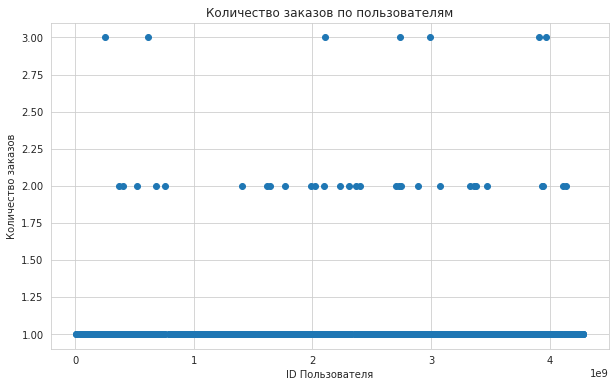

In [21]:
# Постройте точечный график количества заказов по пользователям.
# Сгруппировать данные по пользователям и подсчитать количество заказов
orders_by_user = orders.groupby('visitorId').agg({'transactionId': 'nunique'}).reset_index()
orders_by_user.columns = ['visitorId', 'order_count']

# Построить точечный график
plt.figure(figsize=(10, 6))
plt.scatter(orders_by_user['visitorId'], orders_by_user['order_count'])
plt.title('Количество заказов по пользователям')
plt.xlabel('ID Пользователя')
plt.ylabel('Количество заказов')
plt.grid(True)
plt.show()

=> Пользователи с высоким числом заказов могут быть аномалиями. Необходимо проанализировать их поведение, чтобы понять, не связаны ли они с ошибками в данных или другими факторами. Поскольку большинство пользователей совершают малое число покупок, следует разработать стратегии для повышения их активности, такие как специальные предложения или программы лояльности. Активные пользователи, вероятно, имеют значительное влияние на выручку. С ними стоит работать более плотно, предлагая персонализированные акции или предложения.

In [22]:
# Посчитайте 95-й и 99-й перцентили количества заказов на пользователя. 
# Выберите границу для определения аномальных пользователей.
orders_by_user = orders.groupby('visitorId').agg({'transactionId': 'nunique'}).reset_index()
orders_by_user.columns = ['visitorId', 'order_count']

# Вычисление 95-го и 99-го перцентилей
percentile_95 = np.percentile(orders_by_user['order_count'], 95)
percentile_99 = np.percentile(orders_by_user['order_count'], 99)

percentile_95, percentile_99

(1.0, 2.0)

=> Граница для определения аномальных пользователей = (1.0, 2.0)

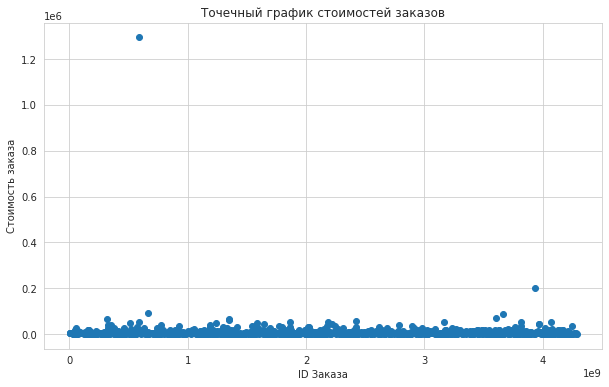

In [23]:
#Постройте точечный график стоимостей заказов.
plt.figure(figsize=(10, 6))
plt.scatter(orders['transactionId'], orders['revenue'])
plt.title('Точечный график стоимостей заказов')
plt.xlabel('ID Заказа')
plt.ylabel('Стоимость заказа')
plt.grid(True)
plt.show()

=> Заказы с чрезвычайно высокой стоимостью требуют проверки. Это могут быть либо ошибки в данных, либо уникальные крупные продажи. Аномально высокие заказы могут существенно влиять на средние значения. Для корректного анализа рекомендуется использовать медианные значения или проводить анализ на очищенных данных, исключая выбросы. Возможно, стоит изучить поведение клиентов, совершивших крупные заказы, для выявления стратегий, которые могут быть применены к другим клиентам.

In [24]:
# Посчитайте 95-й и 99-й перцентили стоимости заказов.
# Вычисление 95-го и 99-го перцентилей
percentile_95_revenue = np.percentile(orders['revenue'], 95)
percentile_99_revenue = np.percentile(orders['revenue'], 99)

percentile_95_revenue, percentile_99_revenue

(26785.0, 53904.0)

=> Граница для определения аномальных пользователей = (26785.0, 53904.0)

Статистическая значимость различий в среднем количестве заказов на посетителя между группами по «сырым» данным:
 * H0 - среднее количество заказов в группа A и B одинаковое.
 * H1 - среднее количество заказов в группа A и B разное.

In [26]:
# Группируем данные по посетителям которые сделали хотя бы 1 заказ по группе А
ordersByUsersA = (
    orders[orders['group'] == 'A']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsersA.columns = ['userId', 'orders']

# Заводим переменную sampleA в которой пользователям будет соответствовать количество заказов
sampleA = pd.concat(
    [
        ordersByUsersA['orders'],
        pd.Series(
            0, 
            index=np.arange(
                visitors[visitors['group']=='A']['visitors'].sum()-len(ordersByUsersA)
            ), 
            name='orders')
    ],
    axis=0
)

# Группируем данные по посетителям которые сделали хотя бы 1 заказ по группе B
ordersByUsersB = (
    orders[orders['group'] == 'B']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsersB.columns = ['userId', 'orders']

# Заводим переменную sampleB в которой пользователям будет соответствовать количество заказов
sampleB = pd.concat(
    [
        ordersByUsersB['orders'],
        pd.Series(
            0, 
            index=np.arange(
                visitors[visitors['group']=='B']['visitors'].sum()-len(ordersByUsersB)
            ), 
            name='orders')
    ],
    axis=0
)

# Тест Манна-Уитни
stat, p_value = mannwhitneyu(sampleA, sampleB, alternative='two-sided')
if p_value < 0.05:
    print(f"P value = {p_value:.3f}, отвергам нулевую гипотезу")
    print("Различия в среднем количестве заказов на посетителя между группами A и B статистически значимы.")
else:
    print(f"P value = {p_value:.3f}, принимаем нулевую гипотезу")
    print("Различия в среднем количестве заказов на посетителя между группами A и B статистически незначимы.")

P value = 0.011, отвергам нулевую гипотезу
Различия в среднем количестве заказов на посетителя между группами A и B статистически значимы.


In [27]:
# Вычисляем среднее количество заказов на посетителя для каждой группы
meanA = sampleA.mean()
meanB = sampleB.mean()

# Вычисляем абсолютную и относительную разницу
absolute_difference = meanB - meanA
relative_difference = (meanB - meanA) / meanA * 100

# Печатаем результаты
print(f"Среднее количество заказов на посетителя в группе A: {meanA:.3f}")
print(f"Среднее количество заказов на посетителя в группе B: {meanB:.3f}")
print(f"Абсолютная разница: {absolute_difference:.3f}")
print(f"Относительная разница: {relative_difference:.2f}%")

Среднее количество заказов на посетителя в группе A: 0.025
Среднее количество заказов на посетителя в группе B: 0.029
Абсолютная разница: 0.004
Относительная разница: 15.98%


Статистическая значимость различий в среднем чеке заказа между группами по «сырым» данным.
 * H0 - различий в среднем чеке заказа между группами A и B нет.
 * H1 - различия в среднем чеке заказа между группами A и B есть.

In [28]:
# Разделить данные на две группы
revenue_A = orders[orders['group'] == 'A']['revenue']
revenue_B = orders[orders['group'] == 'B']['revenue']

# Применить тест Манна-Уитни
#stat, p_value = mannwhitneyu(revenue_A, revenue_B, alternative='two-sided')

#stat, p_value

In [29]:
# Тест Манна-Уитни
stat, p_value = mannwhitneyu(revenue_A, revenue_B, alternative='two-sided')
if p_value < 0.05:
    print(f"P value = {p_value:.3f}, отвергам нулевую гипотезу")
    print("Различия в среднем чеке заказа между группами A и B статистически значимы.")
else:
    print(f"P value = {p_value:.3f}, принимаем нулевую гипотезу")
    print("Различия в среднем чеке заказа между группами A и B статистически незначимы.")

P value = 0.829, принимаем нулевую гипотезу
Различия в среднем чеке заказа между группами A и B статистически незначимы.


In [30]:
# Вычисляем средний чек заказа между группами
meanA = revenue_A.mean()
meanB = revenue_B.mean()

# Вычисляем абсолютную и относительную разницу
absolute_difference = meanB - meanA
relative_difference = (meanB - meanA) / meanA * 100

# Печатаем результаты
print(f"Средний чек заказа в группе A: {meanA:.3f}")
print(f"Средний чек заказа в группе B: {meanB:.3f}")
print(f"Абсолютная разница: {absolute_difference:.3f}")
print(f"Относительная разница: {relative_difference:.2f}%")

Средний чек заказа в группе A: 7189.436
Средний чек заказа в группе B: 9249.949
Абсолютная разница: 2060.513
Относительная разница: 28.66%


Посчитайте статистическую значимость различий в среднем количестве заказов на посетителя между группами по «очищенным» данным.
 * H0 - среднее количество заказов в группа A и B одинаковое.
 * H1 - среднее количество заказов в группа A и B разное.

In [32]:
# Исходные данные и их агрегирование
ordersByUsersA = (
    orders[orders['group'] == 'A']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsersA.columns = ['userId', 'orders']

ordersByUsersB = (
    orders[orders['group'] == 'B']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsersB.columns = ['userId', 'orders']

# Определение 95-го процентиля для группы A
percentile95_A = np.percentile(ordersByUsersA['orders'], 95)

# Определение 95-го процентиля для группы B
percentile95_B = np.percentile(ordersByUsersB['orders'], 95)

# Фильтрация аномальных заказов
filteredOrdersA = ordersByUsersA[ordersByUsersA['orders'] <= percentile95_A]
filteredOrdersB = ordersByUsersB[ordersByUsersB['orders'] <= percentile95_B]

# Обновим переменные sampleA и sampleB для "очищенных" данных:
sampleA_clean = pd.concat(
    [
        filteredOrdersA['orders'],
        pd.Series(
            0,
            index=np.arange(visitors[visitors['group'] == 'A']['visitors'].sum() - len(filteredOrdersA)),
            name='orders'
        )
    ],
    axis=0
)

sampleB_clean = pd.concat(
    [
        filteredOrdersB['orders'],
        pd.Series(
            0,
            index=np.arange(visitors[visitors['group'] == 'B']['visitors'].sum() - len(filteredOrdersB)),
            name='orders'
        )
    ],
    axis=0
)

# Тест Манна-Уитни на очищенных данных
stat, p_value = mannwhitneyu(sampleA_clean, sampleB_clean, alternative='two-sided')

if p_value < 0.05:
    print(f"P value = {p_value:.3f}, отвергам нулевую гипотезу")
    print("Различия в среднем количестве заказов на посетителя между группами A и B статистически значимы.")
else:
    print(f"P value = {p_value:.3f}, принимаем нулевую гипотезу")
    print("Различия в среднем количестве заказов на посетителя между группами A и B статистически незначимы.")

P value = 0.009, отвергам нулевую гипотезу
Различия в среднем количестве заказов на посетителя между группами A и B статистически значимы.


In [33]:
# Вычисляем среднее количество заказов на посетителя для каждой группы
meanA = sampleA_clean.mean()
meanB = sampleB_clean.mean()

# Вычисляем абсолютную и относительную разницу
absolute_difference = meanB - meanA
relative_difference = (meanB - meanA) / meanA * 100

# Печатаем результаты
print(f"Среднее количество заказов на посетителя в группе A: {meanA:.3f}")
print(f"Среднее количество заказов на посетителя в группе B: {meanB:.3f}")
print(f"Абсолютная разница: {absolute_difference:.3f}")
print(f"Относительная разница: {relative_difference:.2f}%")

Среднее количество заказов на посетителя в группе A: 0.023
Среднее количество заказов на посетителя в группе B: 0.027
Абсолютная разница: 0.004
Относительная разница: 18.30%


Статистическая значимость различий в среднем чеке заказа между группами по «очищенным» данным.
 * H0 - различий в среднем чеке заказа между группами A и B нет.
 * H1 - различия в среднем чеке заказа между группами A и B есть.

In [34]:
# Определить аномальные заказы
percentile_95_revenue = np.percentile(orders['revenue'], 95)
clean_orders = orders[orders['revenue'] <= percentile_95_revenue]

# Разделить очищенные данные на группы
revenue_A = clean_orders[clean_orders['group'] == 'A']['revenue']
revenue_B = clean_orders[clean_orders['group'] == 'B']['revenue']

# Применить тест Манна-Уитни
#stat, p_value = mannwhitneyu(revenue_A, revenue_B, alternative='two-sided')

#stat, p_value

In [35]:
# Тест Манна-Уитни
stat, p_value = mannwhitneyu(revenue_A, revenue_B, alternative='two-sided')
if p_value < 0.05:
    print(f"P value = {p_value:.3f}, отвергам нулевую гипотезу")
    print("Различия в среднем чеке заказа между группами A и B статистически значимы.")
else:
    print(f"P value = {p_value:.3f}, принимаем нулевую гипотезу")
    print("Различия в среднем чеке заказа между группами A и B статистически незначимы.")

P value = 0.699, принимаем нулевую гипотезу
Различия в среднем чеке заказа между группами A и B статистически незначимы.


In [36]:
# Вычисляем средний чек заказа между группами
meanA = revenue_A.mean()
meanB = revenue_B.mean()

# Вычисляем абсолютную и относительную разницу
absolute_difference = meanB - meanA
relative_difference = (meanB - meanA) / meanA * 100

# Печатаем результаты
print(f"Средний чек заказа в группе A: {meanA:.3f}")
print(f"Средний чек заказа в группе B: {meanB:.3f}")
print(f"Абсолютная разница: {absolute_difference:.3f}")
print(f"Относительная разница: {relative_difference:.2f}%")

Средний чек заказа в группе A: 5199.594
Средний чек заказа в группе B: 4894.233
Абсолютная разница: -305.361
Относительная разница: -5.87%


### Вывод:

* Остановить тест, так как статистически значимые различия были обнаружены в среднем количестве заказов на посетителя между группами A и B. Хотя статистически значимой разницы в среднем чеке заказа между группами A и B зафиксировано не было.


* В группе B среднее количество заказов на посетителя составило 0.027, что на 0.004 (или 18.30%) больше, чем в группе A, где этот показатель составлял 0.023. Это свидетельствует о том, что изменения внесенные в группу B, положительно повлияли на количество заказов.


* По среднему чеку заказа статистически значимых различий между группами A и B не выявлено. Средний чек в группе A составлял 5199.594, а в группе B — 4894.233. Абсолютная разница составила -305.361, что соответствует относительной разнице в -5.87%. Несмотря на это, отсутствие статистически значимой разницы по среднему чеку означает, что чек не только не увеличился, но и существенно не снизился.


* Увеличение количества заказов при сохранении среднего чека говорит о росте общей выручки, что соответствует нашей основной цели.


* Можно рассмотреть возможность внедрения улучшенных маркетинговых решений для повышения среднего чека, что дополнительно может увеличить общую выручку. Такой подход может усилить положительный эффект от уже достигнутого роста количества заказов.